# Sales analysis

Importing libraries

In [76]:
import pandas as pd
import numpy as np
import os

In [77]:
#Task 1:  Merging 12 months of sales data 
data = pd.read_csv( 'C:\\Users\\User\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Sales_April_2019.csv')

In [78]:
files = [file for file in os.listdir('C:\\Users\\User\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\')]

combined = pd.DataFrame()

for file in files:
    data = pd.read_csv("C:\\Users\\User\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\" + file)
    combined = pd.concat([combined, data])

combined.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"


## Question 1: What was the best month for sales? How much was earned that month?

In [79]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186849 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 5.7+ MB


# Clean up data

In [80]:
data_nan = combined[combined.isna().any(axis=1)]
data_nan.head()
#looks like there are whole rows with missing values therefore nothing needs to be filled in and I can drop the whole rows

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
355,NaN,NaN,NaN,NaN,NaN,NaN
734,NaN,NaN,NaN,NaN,NaN,NaN
1432,NaN,NaN,NaN,NaN,NaN,NaN
1552,NaN,NaN,NaN,NaN,NaN,NaN
1570,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
combined = combined.dropna(how = 'all')

In [82]:
#Adding month column
combined['Month'] = combined['Order Date'].str[0:2]

In [83]:
combined['Month'] = (combined['Month'].astype(int))

ValueError: invalid literal for int() with base 10: 'Or'

In [84]:
#Find invalid literal for int() with base 10: 'Or'

find_or = combined[combined['Order Date'].str[0:2] == 'Or']

In [85]:
find_or.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
518,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1148,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1154,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2877,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2892,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [86]:
combined = combined[combined['Order Date'].str[0:2] != 'Or']

In [87]:
#Find invalid literal for int() with base 10: '1/'

combined = combined[combined['Order Date'].str[0:2] != '1/']
#Change Month col from type str to type int
combined['Month'] = combined['Month'].astype('int32')

In [88]:
combined.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/2019 8:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4


# Adding sales column

In [89]:
combined['Sales'] = combined['Quantity Ordered'] * combined['Price Each']

TypeError: can't multiply sequence by non-int of type 'str'

In [90]:
# Convert columns to the correct type
combined['Quantity Ordered'] = combined['Quantity Ordered'].astype(int)
combined['Price Each'] = combined['Price Each'].astype(float)

In [91]:
combined['Sales'] = combined['Quantity Ordered'] * combined['Price Each']

In [92]:
combined.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [93]:
sales_ = combined.groupby('Month').sum()

In [94]:
#The answer to the 1st question: December(12) has the most sales and January(1) was the weakest month of them all

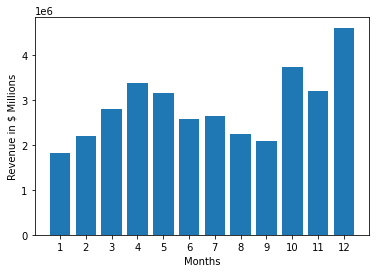

In [95]:
#Visualizing Question 1 
import matplotlib.pyplot as plt

Months_ = range (1, 13)

plt.bar(Months_,sales_['Sales'])
plt.xticks(Months_)

plt.ylabel('Revenue in $ Millions')
plt.xlabel('Months')
plt.show()

# Question 2: What city had the highest number of sales?

In [96]:
combined['Purchase Address'].value_counts()

193 Forest St, San Francisco, CA 94016    9
279 Sunset St, San Francisco, CA 94016    8
223 Elm St, Los Angeles, CA 90001         8
176 North St, San Francisco, CA 94016     7
284 Walnut St, San Francisco, CA 94016    7
                                         ..
687 North St, Seattle, WA 98101           1
980 West St, San Francisco, CA 94016      1
708 Cherry St, Dallas, TX 75001           1
734 Center St, Portland, ME 04101         1
909 13th St, Atlanta, GA 30301            1
Name: Purchase Address, Length: 140768, dtype: int64

In [97]:
yeah = combined['Purchase Address'].str.split()

In [98]:
yeah.str[3].value_counts()

San          44720
Los          29604
New          24866
Boston,      19930
Atlanta,     14881
Dallas,      14818
Seattle,     14731
Portland,    12463
Austin,       9903
Name: Purchase Address, dtype: int64

In [99]:
combined['Cities'] = yeah.str[-3]

In [100]:
combined['Cities'] = (combined['Cities']
                      .str.replace(',', '')
                      .str.replace('Angeles', 'Los Angeles')
                      .str.replace('Francisco', 'San Francisco')
                      .str.replace('City', 'New York City')
                     )

In [101]:
combined['Cities'].value_counts()

San Francisco    44720
Los Angeles      29604
New York City    24866
Boston           19930
Atlanta          14881
Dallas           14818
Seattle          14731
Portland         12463
Austin            9903
Name: Cities, dtype: int64

In [102]:
combined.groupby('Cities').sum()
#Answer to the second question (2)

,Quantity Ordered,Price Each,Month,Sales
Cities,,,,
Atlanta,16602,2.779908e+06,104794,2.795499e+06
Austin,11151,1.809374e+06,69827,1.819082e+06
Boston,22524,3.636083e+06,141108,3.660315e+06
Dallas,16728,2.750913e+06,104618,2.766260e+06
Los Angeles,33288,5.420435e+06,208324,5.451571e+06
New York City,27916,4.634087e+06,175731,4.662977e+06
Portland,14051,2.307594e+06,87763,2.320338e+06
San Francisco,50226,8.209087e+06,315508,8.259719e+06
Seattle,16552,2.733146e+06,104940,2.747605e+06


# Question 3: What time should we display advertisements to maximize the likelyhood of customer buying a product?

In [103]:
combined.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities
0,176558,USB-C Charging Cable,2,11.95,04/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
2,176560,Google Phone,1,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
4,176561,Wired Headphones,1,11.99,04/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [104]:
combined['Order Date'] = pd.to_datetime(combined['Order Date'])

In [105]:
combined.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [106]:
combined['Hour'] = combined['Order Date'].dt.hour 
combined.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [107]:
combined['Minute'] = combined['Order Date'].dt.minute
combined.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,27


In [108]:
combined.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,27


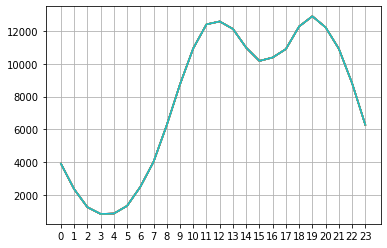

In [109]:
hours = [hour for hour, df in combined.groupby('Hour')]

plt.plot(hours, combined.groupby('Hour').count())
plt.xticks(hours)
plt.grid()
plt.show()

#Answer to question number 3 is that I recommend focusing on the ads in the peak hours which are between 11AM and 19PM

# Question 4: What products are most often sold together?

In [110]:
combined['Order ID'].duplicated()

0        False
1        False
2        False
3         True
4        False
         ...  
11681    False
11682    False
11683    False
11684    False
11685    False
Name: Order ID, Length: 185916, dtype: bool

In [111]:
new_duplicated = combined[combined['Order ID'].duplicated(keep = False)]

In [112]:
new_duplicated.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities,Hour,Minute
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,42
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19,42
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,31
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,31
31,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,17,0
32,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco,17,0
118,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City,11,7
119,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City,11,7


In [113]:
new_duplicated['Grouped'] = new_duplicated.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

c:\users\user\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [114]:
new_duplicated = new_duplicated[['Order ID', 'Grouped']].drop_duplicates()

new_duplicated.head()

,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [115]:
# reference https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

In [116]:
count = Counter()
for row in new_duplicated['Grouped']:
    listt = row.split(',')
    count.update(Counter(combinations(listt, 2)))
    
for key in count.most_common(10):
    print(key)


(('iPhone', 'Lightning Charging Cable'), 1004)
(('Google Phone', 'USB-C Charging Cable'), 987)
(('iPhone', 'Wired Headphones'), 447)
(('Google Phone', 'Wired Headphones'), 414)
(('Vareebadd Phone', 'USB-C Charging Cable'), 361)
(('iPhone', 'Apple Airpods Headphones'), 359)
(('Google Phone', 'Bose SoundSport Headphones'), 220)
(('USB-C Charging Cable', 'Wired Headphones'), 160)
(('Vareebadd Phone', 'Wired Headphones'), 143)
(('Lightning Charging Cable', 'Wired Headphones'), 92)


# Question 5: What product sold the most? Why do you think it sold the most?

In [117]:
combined.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,27


In [120]:
gru = combined.groupby('Product')

u = gru.sum()['Quantity Ordered']

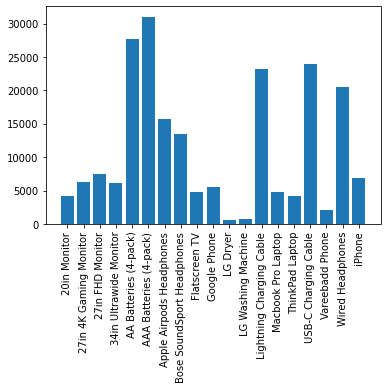

In [133]:
products = [product for product, df in gru]

plt.bar(products, u)
plt.xticks(rotation = 90)
plt.show()
# Answer to question 5 : AAABatteries(4pack) are the most sold